In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/Users/sange/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

#Dataset Information

In [6]:
df.shape

(7043, 21)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#Check TotalCharges Column that contain strings
df.loc[df["TotalCharges"].str.contains(" ")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
#Get TotalCharges data that does not contain strings
df = df.loc[~df["TotalCharges"].str.contains(" ")]
#change data type TotalCharges Column to float
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [12]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there are no missing values in the data

# Duplicated Check

In [13]:
df.duplicated().sum()

0

# Data Understanding

In [14]:
#separate categorical and numerical column
categorical = ["customerID","gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]
numerical = ["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]

In [15]:
#numerical statistical summary
df[numerical].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
#see value from discrete data
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [17]:
#categorical statistical summary
df[categorical].describe().T

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [18]:
#see value from categorical data
for col in categorical:
  print(f"Value  {col} ")
  print(df[col].value_counts(), "\n")

Value  customerID 
customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64 

Value  gender 
gender
Male      3549
Female    3483
Name: count, dtype: int64 

Value  Partner 
Partner
No     3639
Yes    3393
Name: count, dtype: int64 

Value  Dependents 
Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

Value  PhoneService 
PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

Value  MultipleLines 
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 

Value  InternetService 
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 

Value  OnlineSecurity 
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 

Value  Onli

### Boxplot to see outliers

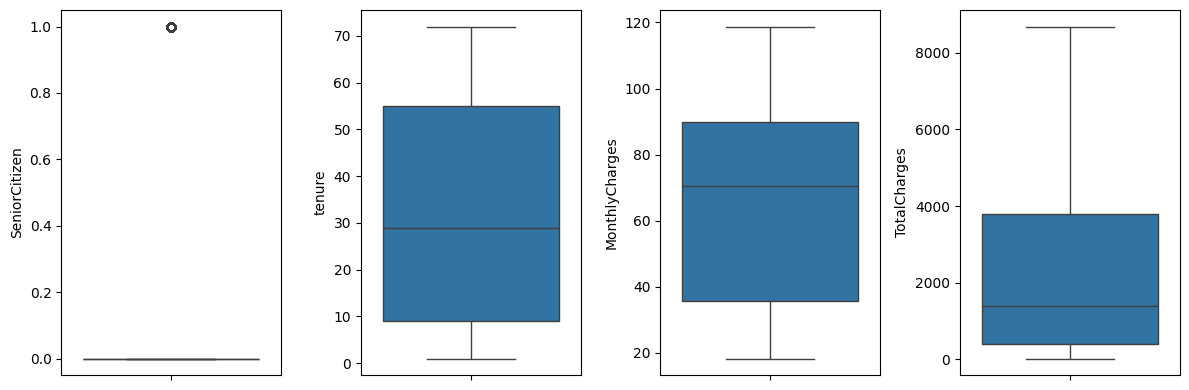

In [19]:
plt.figure(figsize = (12,4))

features = numerical
for i in range(0,len(features)):
  plt.subplot(1,len(features), i+1)
  sns.boxplot(data = df, y = features[i])
  plt.tight_layout()

In [20]:
#cek outlier secara mendetail
outlier = df["SeniorCitizen"].max()

df[df["SeniorCitizen"] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Customer Churn Distribution

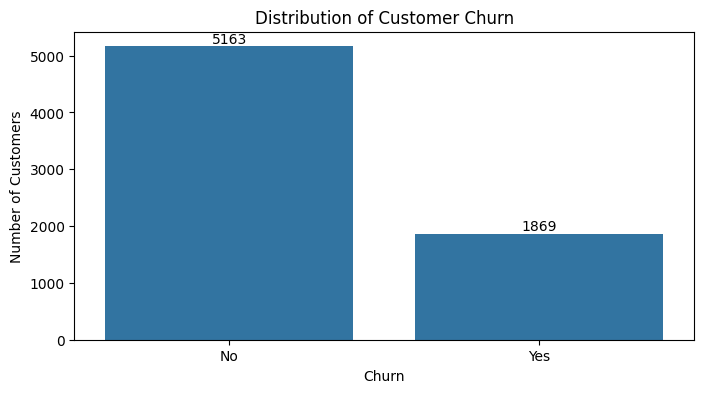

In [23]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = df["Churn"])
ax.bar_label(ax.containers[0], color = "black")
plt.title("Distribution of Customer Churn")
plt.ylabel("Number of Customers")
plt.show()

### Customer Count by Demographic Group

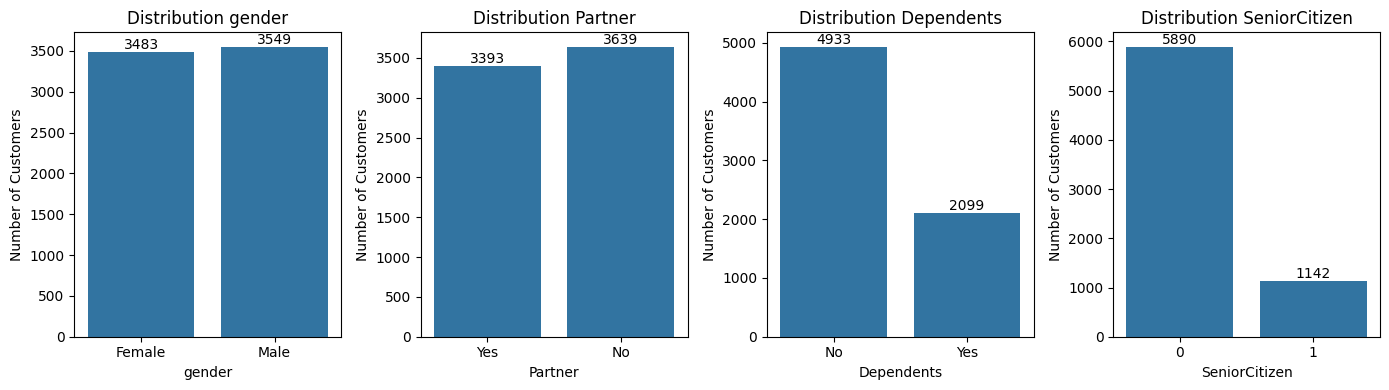

In [24]:
features = ["gender","Partner","Dependents","SeniorCitizen"]
plt.figure(figsize = (14,4))
for i in range(0,len(features)):
  plt.subplot(1, len(features), i+1)
  ax = sns.countplot(x=df[features[i]])
  ax.bar_label(ax.containers[0], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

### Customer Distribution by Service Type

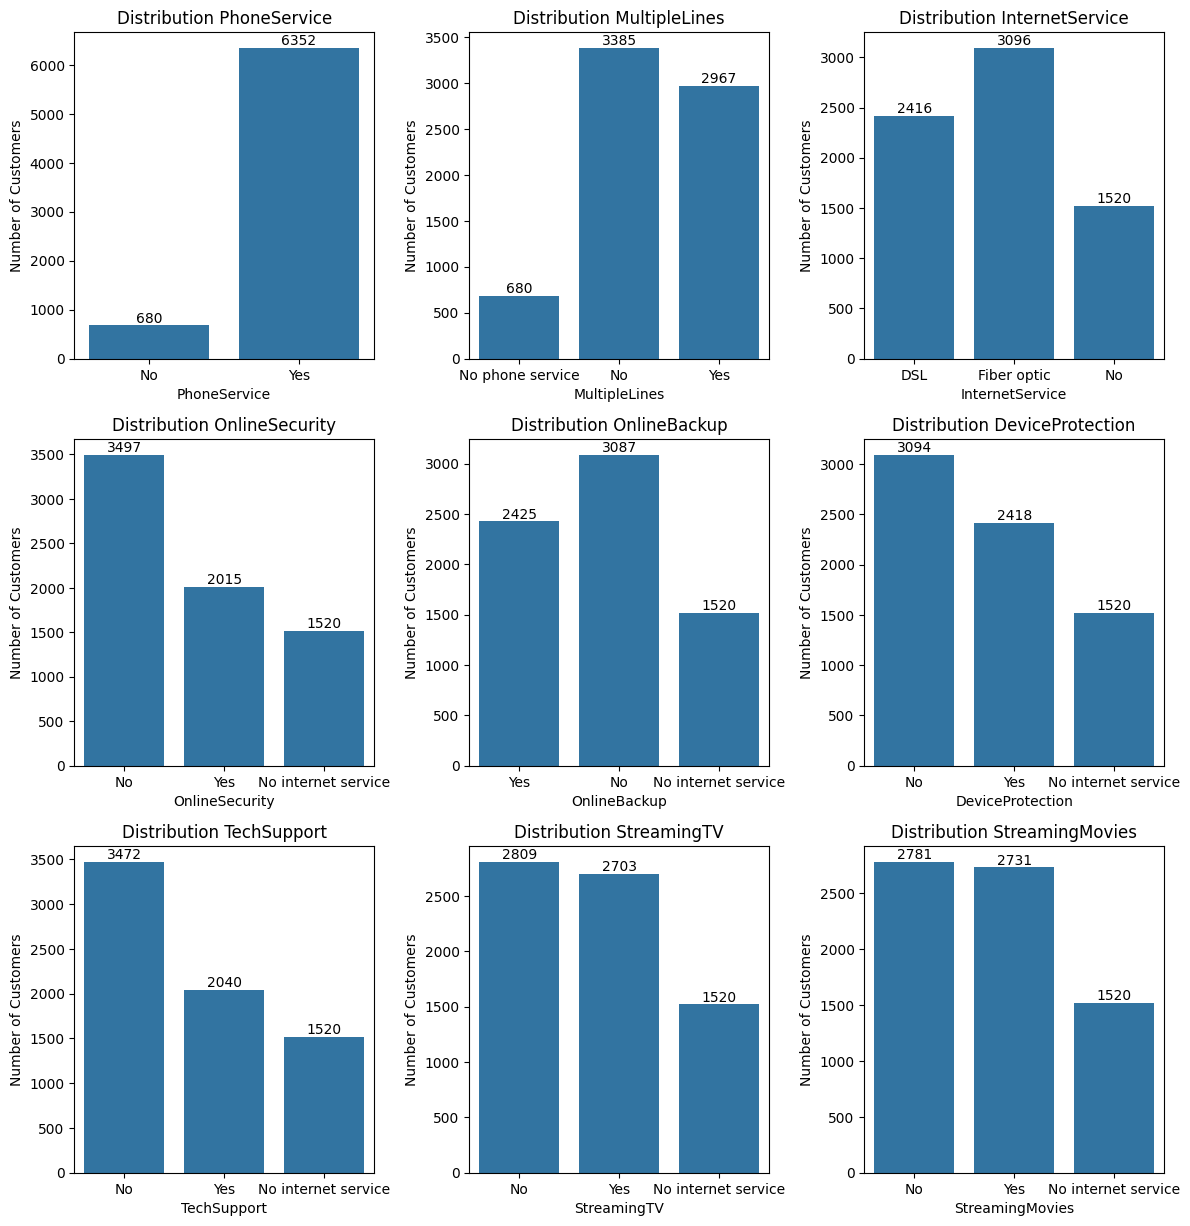

In [25]:
features = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plt.figure(figsize = (12,16))
for i in range(0,len(features)):
  plt.subplot(4, len(features)//3, i+1)
  ax = sns.countplot(x=df[features[i]])
  ax.bar_label(ax.containers[0], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

### Customer Payment Preference Analysis

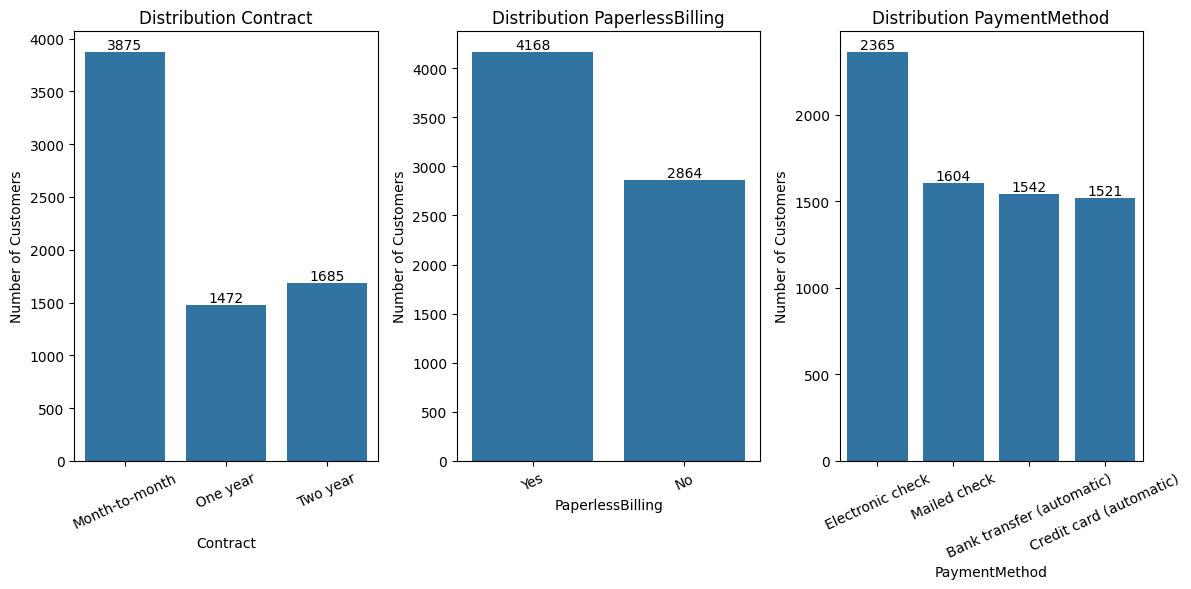

In [26]:
features = ["Contract","PaperlessBilling","PaymentMethod",]
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
  plt.subplot(1, len(features), i+1)
  ax = sns.countplot(x=df[features[i]])
  ax.bar_label(ax.containers[0], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.xticks(rotation = 25)
  plt.tight_layout()

In [27]:
features = numerical

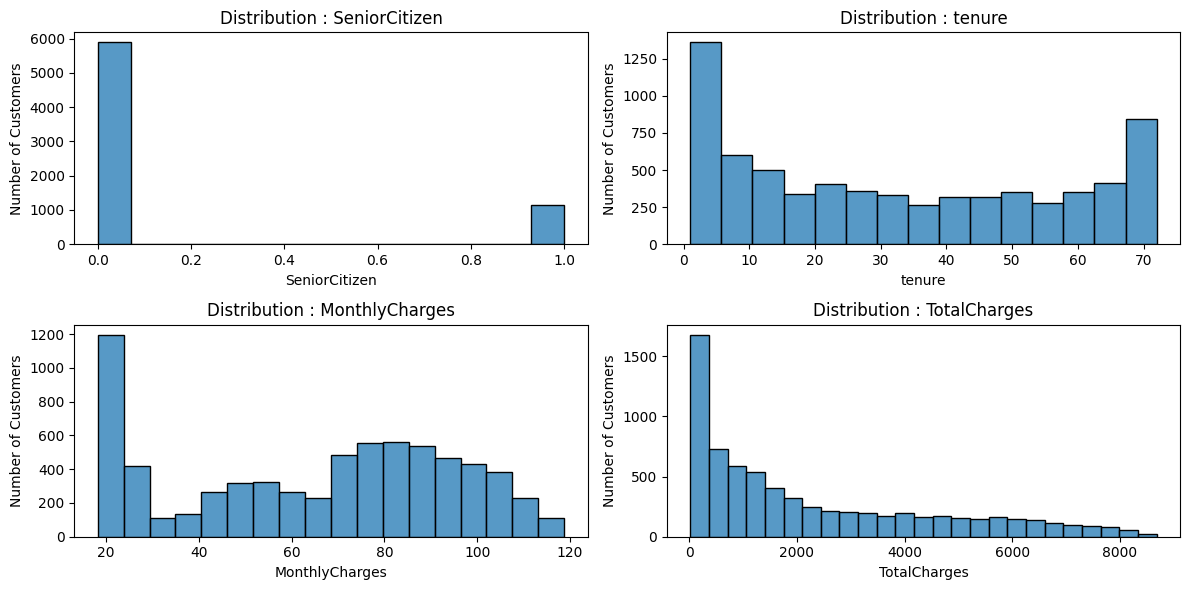

In [28]:
#create histogram to see distribution numerical data
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
  plt.subplot(2, len(features)//2, i+1)
  sns.histplot(x=df[features[i]])
  plt.title("Distribution : " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

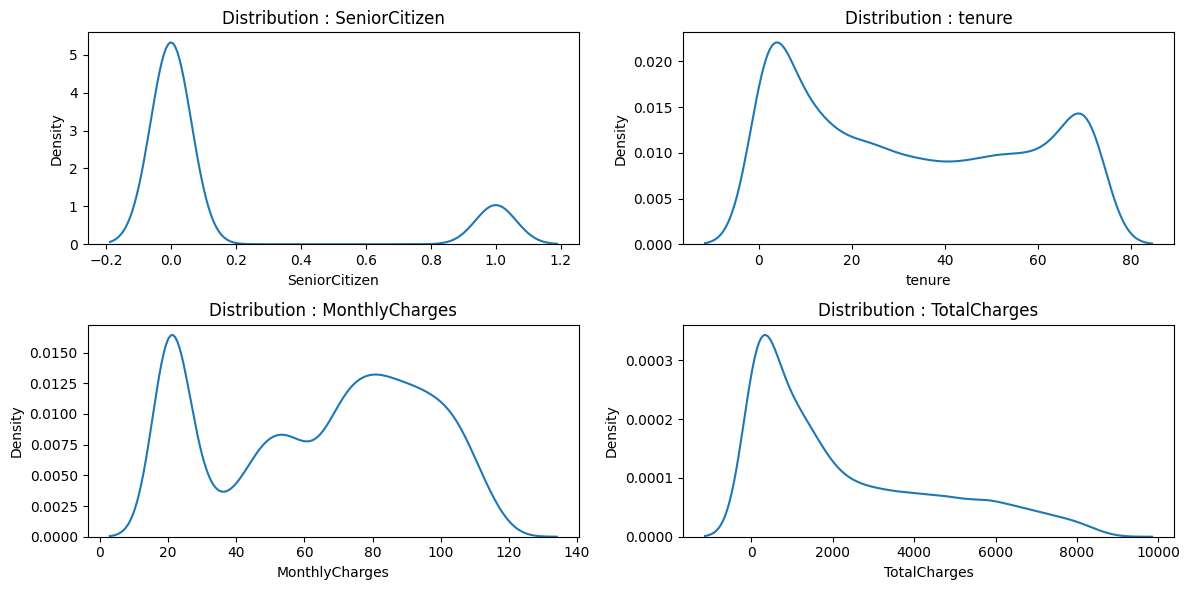

In [26]:
#create KDE Plot to see distribution numerical data
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
  plt.subplot(2, len(features)//2, i+1)
  sns.kdeplot(x=df[features[i]])
  plt.title("Distribution : " + features[i])
  plt.tight_layout()

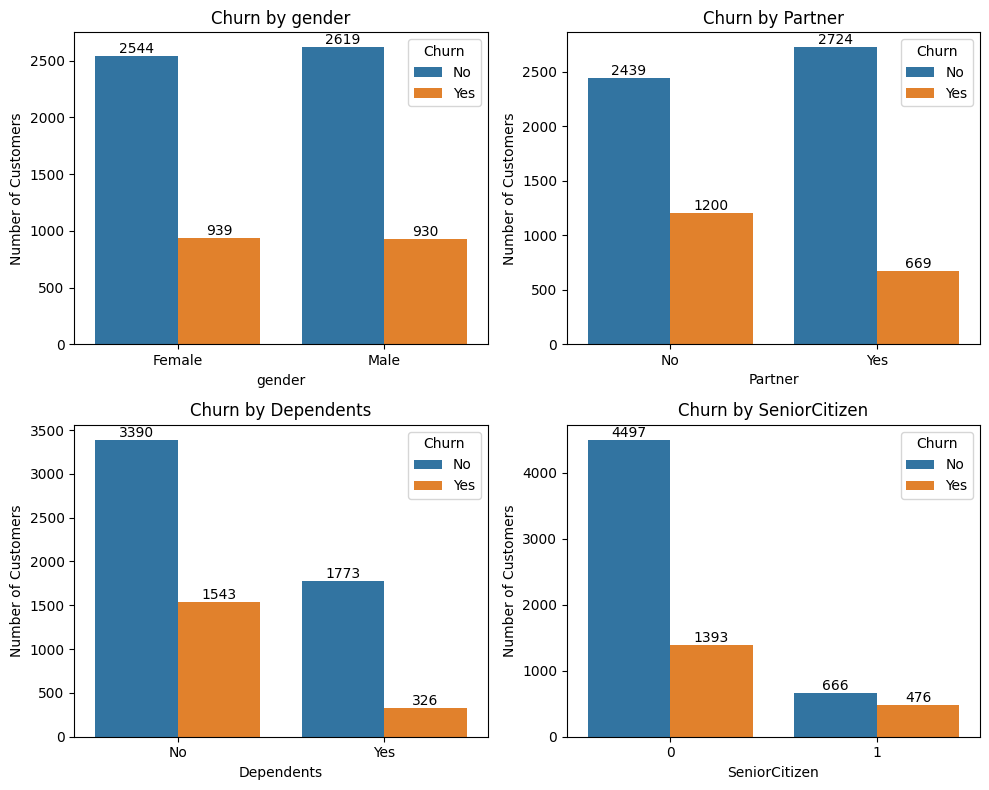

In [29]:
features = ["gender","Partner","Dependents","SeniorCitizen"]
plt.figure(figsize = (10,8))
for i in range(0,len(features)):
  churn_demografi = df.groupby(features[i],as_index = False)["Churn"].value_counts()
  plt.subplot(2, len(features)//2, i+1)
  ax = sns.barplot(x=features[i], y = "count", hue="Churn", data = churn_demografi)
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Churn by " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

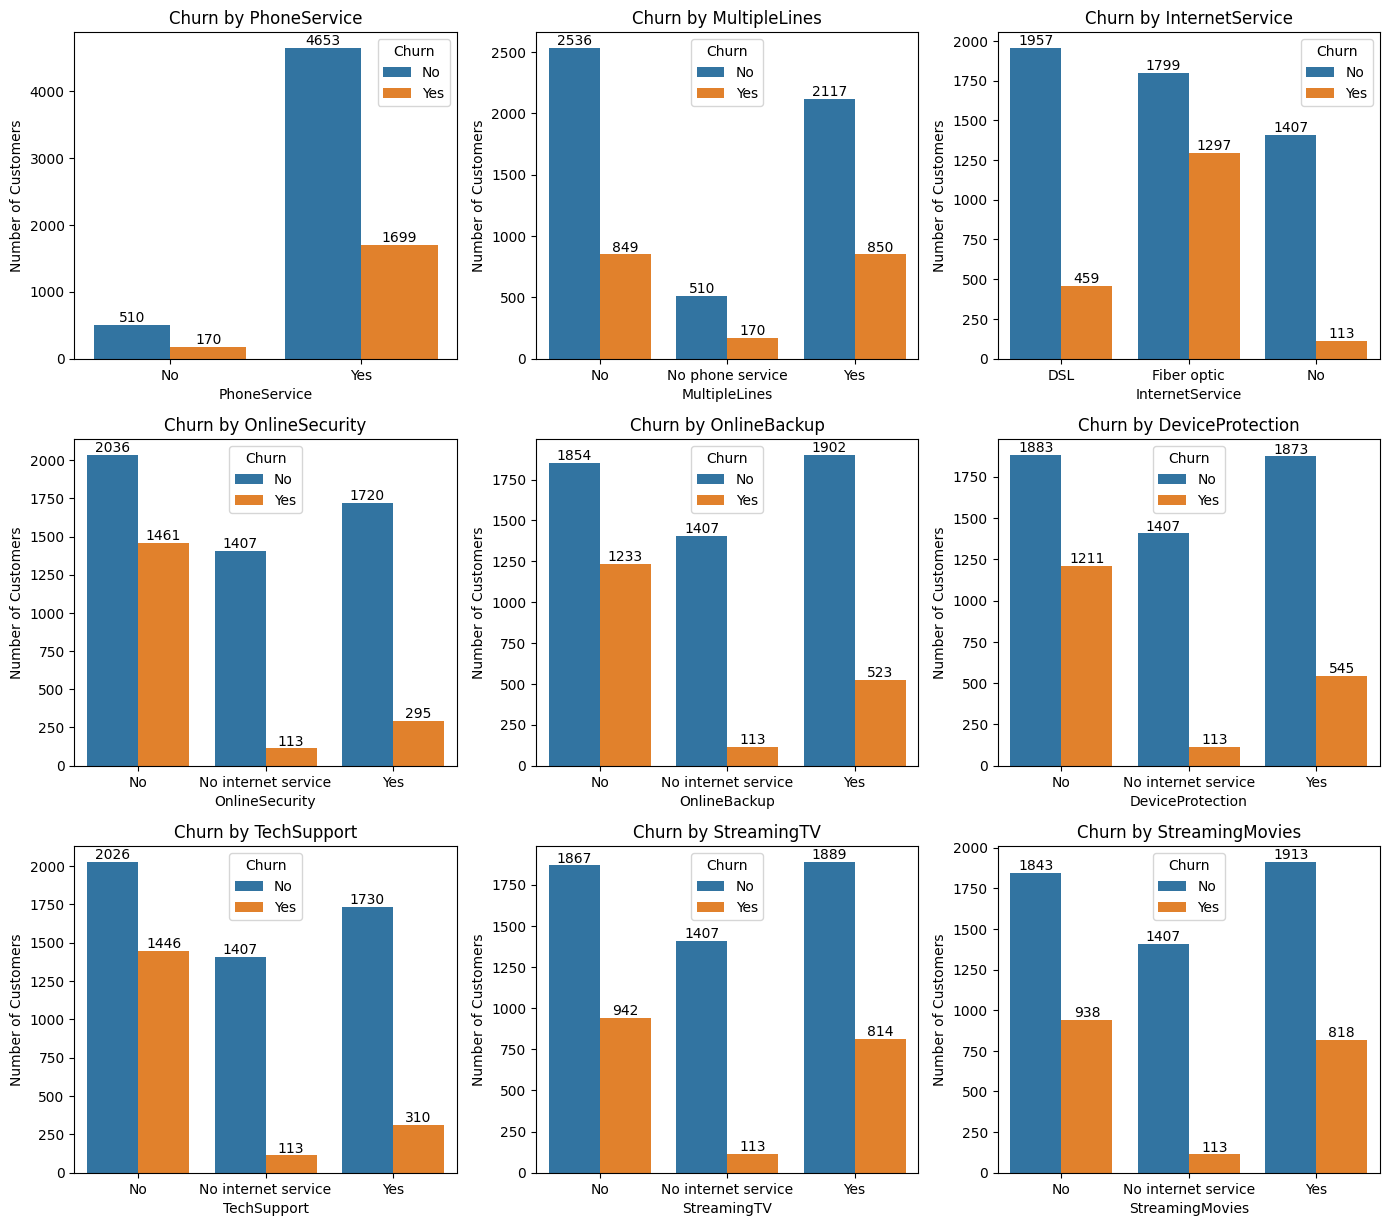

In [30]:
features = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plt.figure(figsize = (14,16))
for i in range(0,len(features)):
  churn_service = df.groupby(features[i],as_index = False)["Churn"].value_counts()
  plt.subplot(4, len(features)//3, i+1)
  ax = sns.barplot(x=features[i], y = "count", hue="Churn", data = churn_service)
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Churn by " + features[i])
  plt.ylabel("Number of Customers")
  plt.tight_layout()

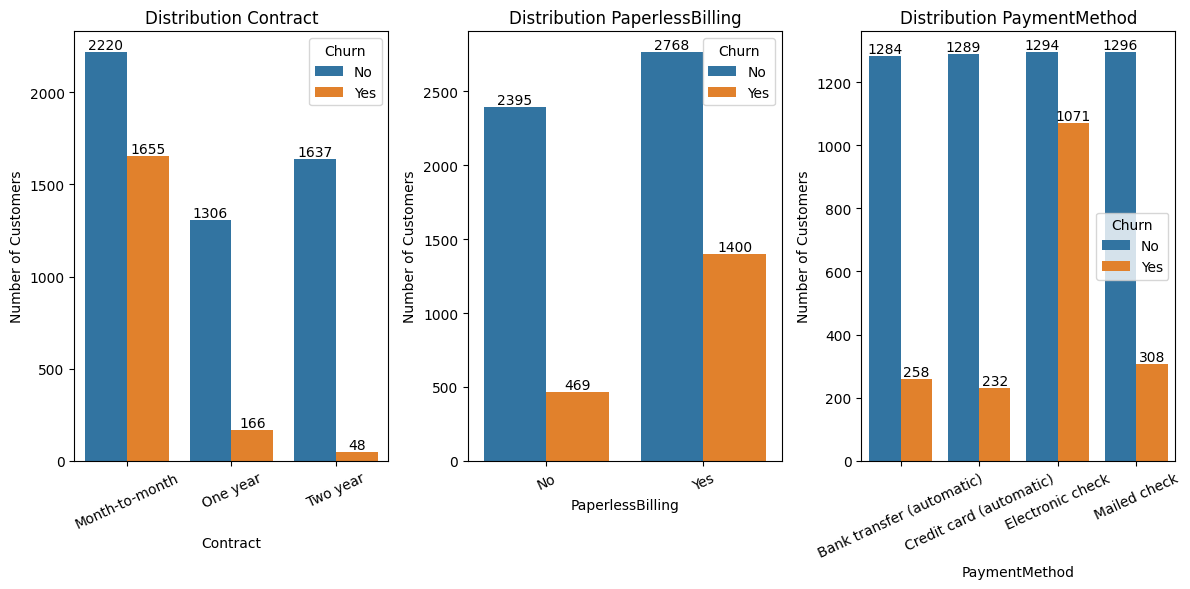

In [31]:
features = ["Contract","PaperlessBilling","PaymentMethod",]
plt.figure(figsize = (12,6))
for i in range(0,len(features)):
  churn_jenispembayaran = df.groupby(features[i],as_index = False)["Churn"].value_counts()
  plt.subplot(1, len(features), i+1)
  ax = sns.barplot(x=features[i], y = "count", hue="Churn", data = churn_jenispembayaran)
  ax.bar_label(ax.containers[0], color = "Black")
  ax.bar_label(ax.containers[1], color = "Black")
  plt.title("Distribution " + features[i])
  plt.ylabel("Number of Customers")
  plt.xticks(rotation = 25)
  plt.tight_layout()

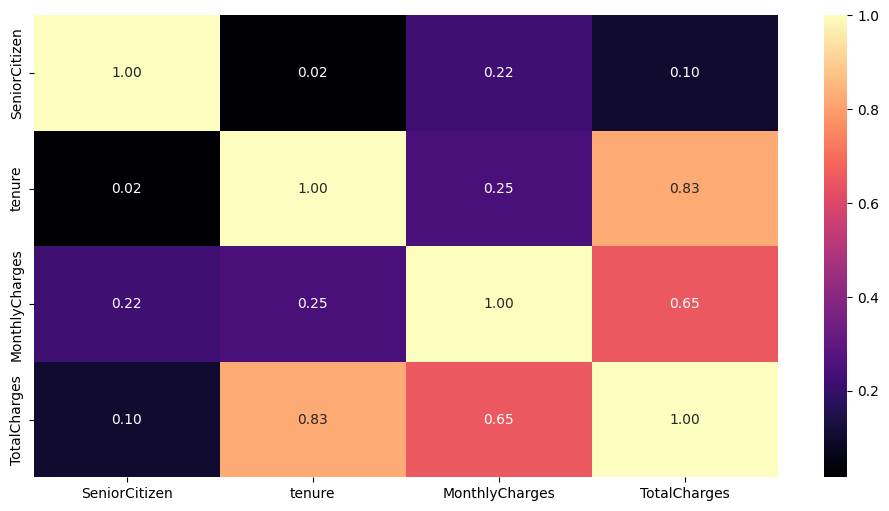

In [32]:
plt.figure(figsize = (12,6))
corr = df[numerical].corr()
sns.heatmap(corr, annot=True, fmt =".2f", cmap="magma")
plt.show()

Scatterplot Churn by Tenure vs TotalCharges

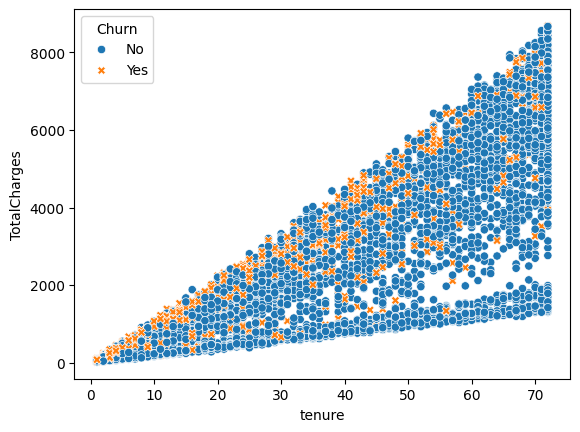

In [33]:
sns.scatterplot(data = df, x = "tenure", y="TotalCharges", hue ="Churn", style="Churn")
plt.show()

Scatterplot Churn by Tenure vs MonthlyCharges

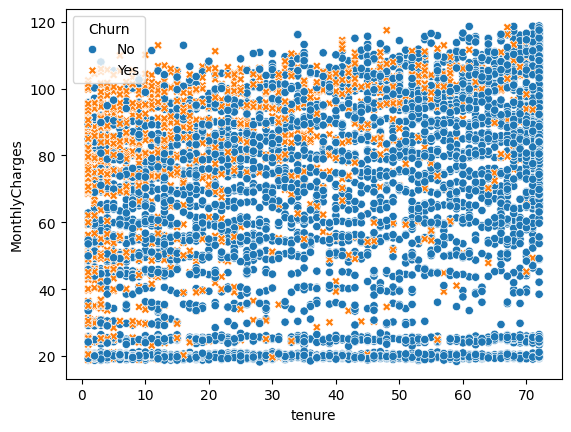

In [34]:
sns.scatterplot(data = df, x = "tenure", y="MonthlyCharges", hue ="Churn", style="Churn")
plt.show()

Scatterplot Churn by MonthlyCharges vs TotalCharges

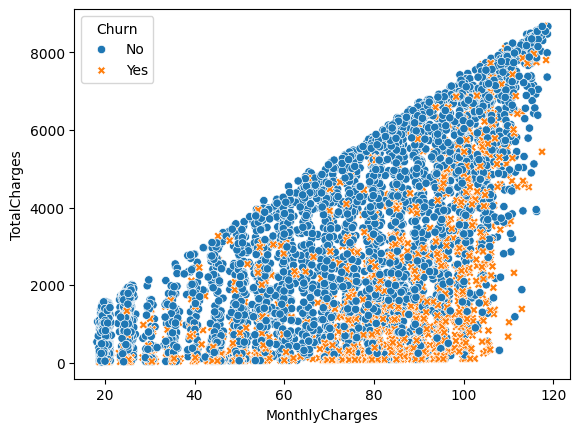

In [35]:
sns.scatterplot(data = df, x = "MonthlyCharges", y="TotalCharges", hue ="Churn", style="Churn")
plt.show()

### Pairplot to view detailed customer churn on numeric type data

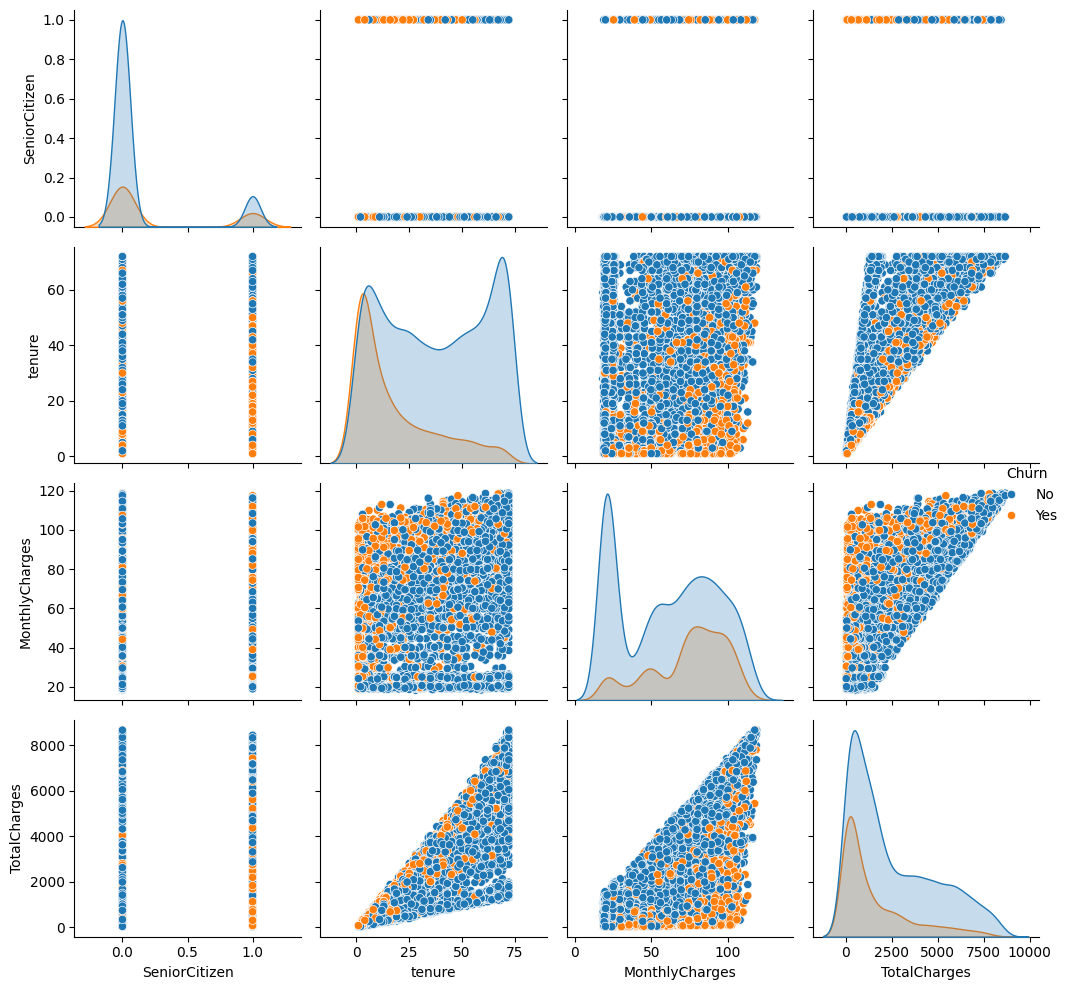

In [36]:
sns.pairplot(df, hue="Churn")
plt.tight_layout()
plt.show()

### What is the average MonthlyCharges and TotalCharges for customers who experience churn?

In [37]:
condition = df["Churn"] == "Yes"
customer_churn = df[condition].groupby(["SeniorCitizen"]).agg(mean_monthlycharges = ("MonthlyCharges", "mean"),
                                                    mean_totalcharges = ("TotalCharges","mean")).reset_index()
customer_churn

,SeniorCitizen,mean_monthlycharges,mean_totalcharges
0,0,72.298098,1421.767229
1,1,80.713445,1853.792332


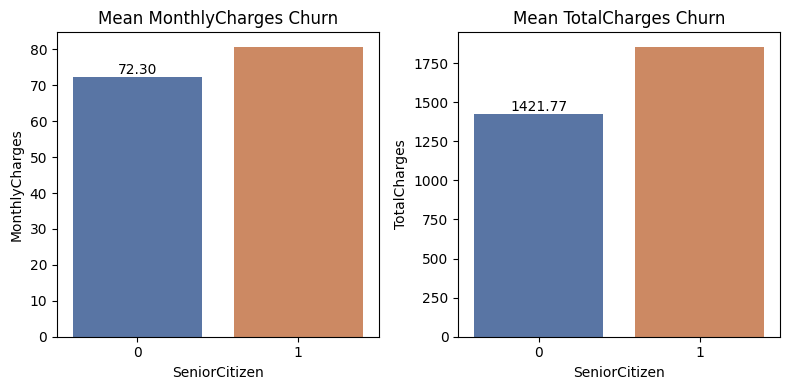

In [38]:
plt.figure(figsize = (8,4))

#Average monthlycharges churn barplot
plt.subplot(1,2,1)
ax = sns.barplot(data = customer_churn, x = "SeniorCitizen", y="mean_monthlycharges", palette="deep")
ax.bar_label(ax.containers[0], color ="Black", fmt = "%.2f")
ax.set_title("Mean MonthlyCharges Churn")
ax.set_ylabel("MonthlyCharges")

#Average totalcharges churn barplot 
plt.subplot(1,2,2)
ax = sns.barplot(data = customer_churn, x = "SeniorCitizen", y="mean_totalcharges", palette="deep")
ax.bar_label(ax.containers[0], color ="Black", fmt = "%.2f")
ax.set_title("Mean TotalCharges Churn")
ax.set_ylabel("TotalCharges")
plt.tight_layout()
plt.show()

### What is the average customer churn based on internet services?



In [39]:
#Create new feature (Feature Engineering)
df['TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [40]:
condition = df["Churn"] == "Yes"
services_churn = df[condition].groupby(["SeniorCitizen","TotalServices"]).agg(count_totalservices = ("TotalServices","count")).reset_index()
services_churn

,SeniorCitizen,TotalServices,count_totalservices
0,0,0,23
1,0,1,389
2,0,2,320
3,0,3,258
4,0,4,209
5,0,5,130
6,0,6,51
7,0,7,13
8,1,0,12
9,1,1,99


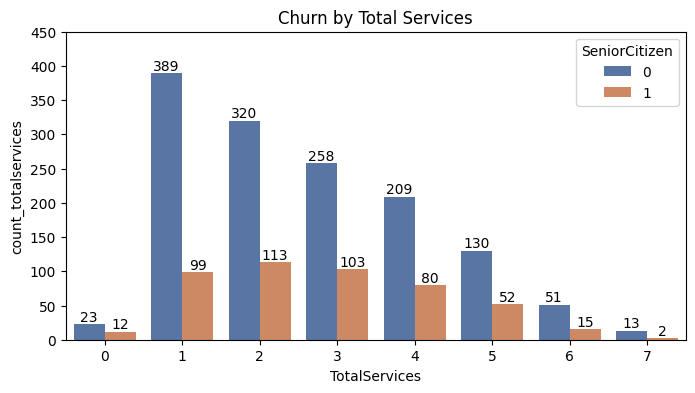

In [41]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data = services_churn, x = "TotalServices", y ="count_totalservices", hue="SeniorCitizen", palette="deep")
ax.bar_label(ax.containers[0], color="Black")
ax.bar_label(ax.containers[1], color="Black")
ax.set_title("Churn by Total Services")
ax.set_ylim(ymax = 450)
plt.show()

### Senior Customer Churn based on tenure

In [42]:
condition = (df["Churn"] == "Yes") & (df["SeniorCitizen"] == 1)
tenure_churn = df[condition].groupby(["SeniorCitizen","tenure"]).agg(count = ("tenure","count") ).reset_index().sort_values("count", ascending = False).head(10)
tenure_churn

,SeniorCitizen,tenure,count
0,1,1,74
1,1,2,30
2,1,3,20
4,1,5,15
7,1,8,15
3,1,4,13
14,1,15,12
26,1,27,11
6,1,7,11
15,1,16,11


**Observation**

The churn that happens to senior customers is more in the 1-month tenure, this is likely due to the large MonthlyCharges and only having limited services.

 Exploratory Data Analysis (EDA) – Key Insights


1.The TotalCharges column was initially stored as an object data type due to the presence of whitespace strings. After removing rows containing invalid values, the column was successfully converted to a float data type, resulting in a final dataset of 7,032 records.

2.The dataset contains no duplicate records, indicating good data integrity.

3.The SeniorCitizen feature is a discrete variable with only two unique values (0 and 1).

4.The tenure variable shows a non-normal, bimodal distribution, with a high concentration of customers in the 1–5 month range.

5.The MonthlyCharges feature has a non-normal distribution, with the highest frequency observed around $20.

6.The TotalCharges variable is right-skewed, with most values concentrated between $0 and $200, indicating that many customers have relatively low cumulative charges.

7.A strong positive relationship exists between:
.Tenure and TotalCharges
.MonthlyCharges and TotalCharges

8.Gender and Partner status show no significant impact on churn, as churn counts are nearly equal across these categories.

9.The majority of customers are younger individuals, as most customers do not have dependents.

10.While churn occurs more frequently among younger customers in absolute numbers, senior citizens have a higher churn rate when measured by percentage.

11.Churn is most prevalent among customers with a tenure of 0–20 months, likely influenced by higher MonthlyCharges and TotalCharges during the early subscription period.

12.Customers who subscribed to only 1–3 services experienced higher churn, suggesting limited service engagement as a churn factor. Additionally, most churned customers use Fiber Optic internet services.



